## 朴素贝叶斯分类器

In [1]:
# 训练速度快，但是泛化能力比线性分类器要稍差
# 通过单独查看每个特征来学习参数，从每个特征中收集简单的类别统计数据
# GaussianNB, BernoulliNB, MultinomialNB 

## 决策树

In [1]:
# 用于分类和回归任务的模型
# 树的每个节点代表一个问题或者一个包含答案的终节点，叶节点
# 要对新数据点进行预测，首先查看这个点位于特征空间划分的哪个区域
# 然后将该区域的多数目标值作为预测结果，从根节点开始对树进行遍历就可以找到这一个区域
# 每一步向左还是向右取决于是否满足相应的测试
# 这是预测

# 回归的化，基于每个节点的测试对树进行遍历，最终找到新数据点所属的叶节点
# 这一数据点的输出是叶节点中所有训练点的平均目标值

In [2]:
# 防止过拟合有两种策略：
# 1. 及早停止树的生长，为预剪枝，比如限制树的最大深度，限制叶节点的最大数目
# 或者规定一个节点中数据点的最小数目来防止继续划分
# 2. 后剪枝，先构造树，随后删除或者折叠信息量很少的节点

In [18]:
# DecisionTreeRegressor DecisionTreeClassifier
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.9370629370629371)

In [9]:
# 进行预剪枝，限制树的深度
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=['malignant', 'benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

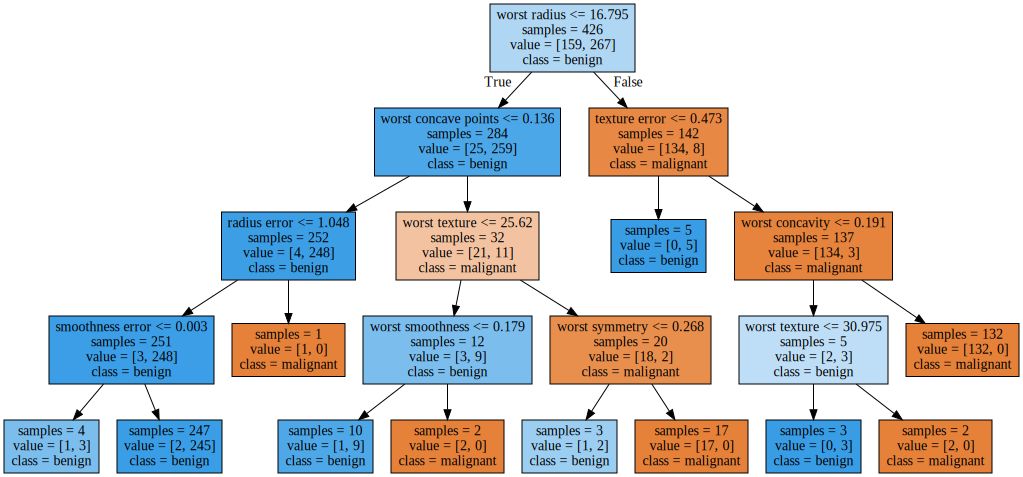

In [15]:
import graphviz
with open('/home/skyrover/repository/lml/tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [16]:
# 特征重要性来表示每个特征对树的决策的重要性排序
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

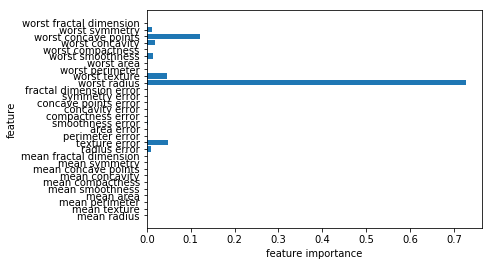

In [21]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # arange返回等差数组
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")

plot_feature_importances_cancer(tree)

In [20]:
np.arange(5)

array([0, 1, 2, 3, 4])

Feature importances: [0. 1.]


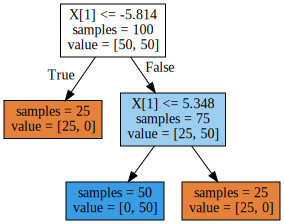

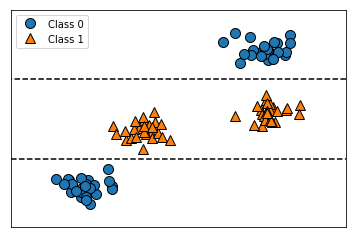

In [23]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [ ]:
# 对于所有基于树的回归模型中，不能外推，不能在训练数据范围之外进行预测